In [1]:
#ANACONDA JUPYTER NOTEBOOK
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage,dendrogram

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91]])

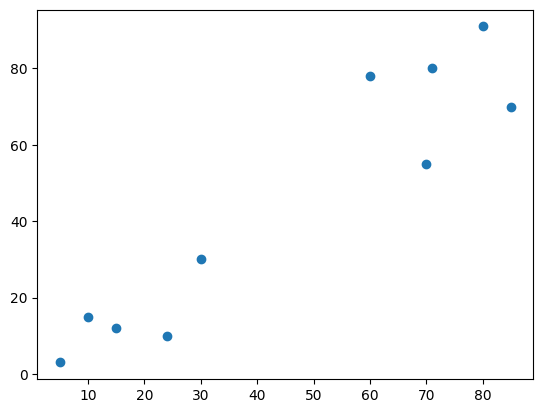

In [3]:
plt.scatter(X[:,0],X[:,1])  ##scatter 散点图
plt.show()

In [4]:
from sklearn import cluster
#模型选择
HC=cluster.AgglomerativeClustering(n_clusters=2,linkage='single') ##n_clusters 聚成几类；linkage一个分类规则；single==最小
#放数据到模型里
HC.fit(X) ##把模型放入数据X中
#看一下分组情况
HC.labels_ ##出结果，观察分组情况

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

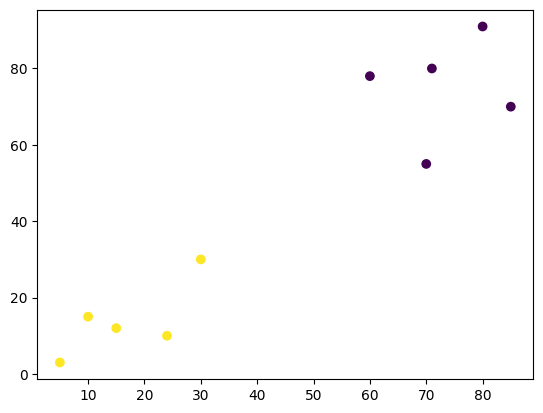

In [5]:
plt.scatter(X[:,0],X[:,1],c=HC.labels_) ##c=color 颜色
plt.show()

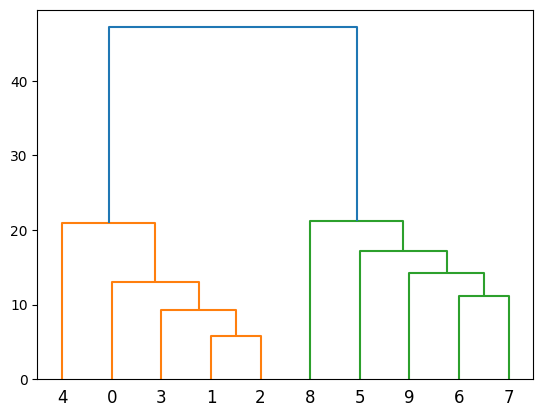

In [6]:
HC_new=linkage(X,method='single')
dendrogram(HC_new)  ##树状图
plt.show()

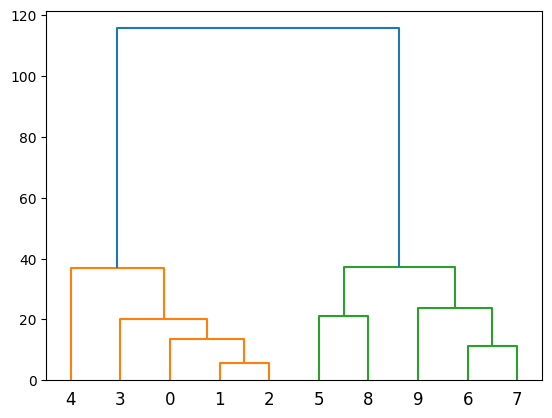

In [7]:
HC_new=linkage(X,method='complete')  ##complete最大
dendrogram(HC_new)
plt.show()

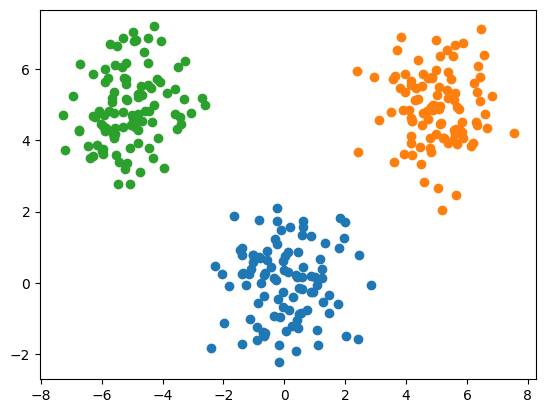

In [8]:
mu1=[0,0]
sigma=[[1,0],[0,1]]
x1,y1=np.random.multivariate_normal(mu1,sigma,100).T
plt.scatter(x1,y1)

mu2=[5,5]
sigma=[[1,0],[0,1]]
x2,y2=np.random.multivariate_normal(mu2,sigma,100).T
plt.scatter(x2,y2)

mu3=[-5,5]
sigma=[[1,0],[0,1]]
x3,y3=np.random.multivariate_normal(mu3,sigma,100).T
plt.scatter(x3,y3)

In [9]:
X1=np.array([x1,y1]).T
X2=np.array([x2,y2]).T
X3=np.array([x3,y3]).T

X=np.r_[X1,X2,X3]

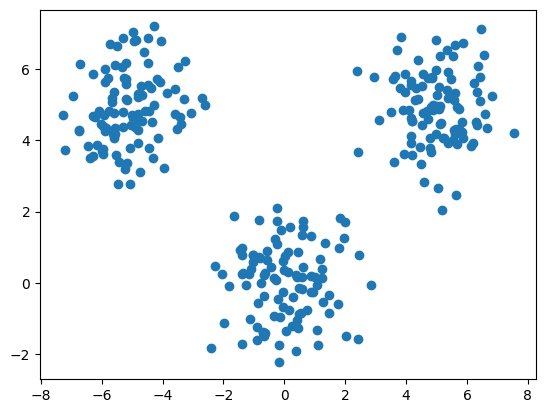

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3)
KM.fit(X)
KM.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

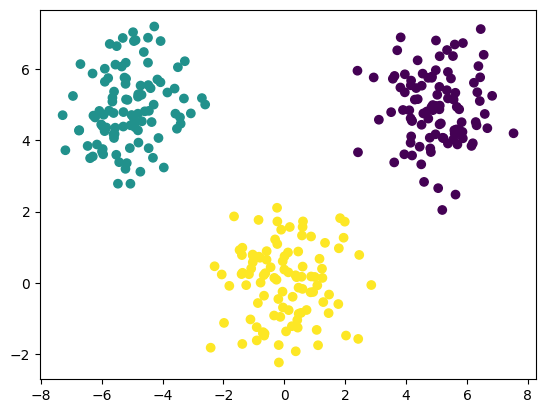

In [12]:
plt.scatter(X[:,0],X[:,1],c=KM.labels_)
plt.show()

In [13]:
def k_SSE(X, clusters):
    # 选择连续的K种不同的值
    K = range(1,clusters+1)
    # 构建空列表用于存储总的簇内离差平方和
    TSSE = []
    for k in K:
        # 用于存储各个簇内离差平方和
        SSE = []
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        # 返回簇标签
        labels = kmeans.labels_
        # 返回簇中心
        centers = kmeans.cluster_centers_
        # 计算各簇样本的离差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,]-centers[label,:])**2))
        # 计算总的簇内离差平方和 
        TSSE.append(np.sum(SSE))
# 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')
    # 绘制K的个数与GSSE的关系
    plt.plot(K, TSSE, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内离差平方和之和')
    # 显示图形
    plt.show()


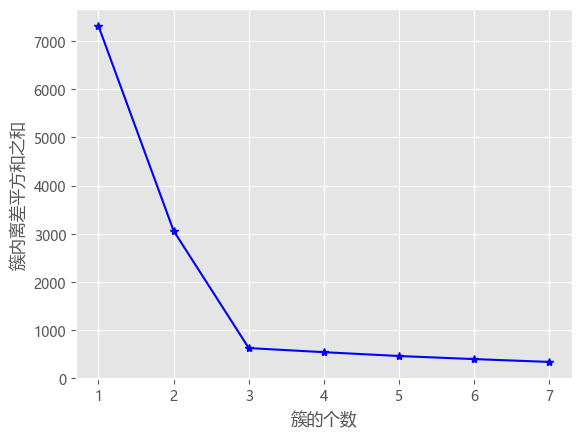

In [14]:
X=pd.DataFrame(X)
k_SSE(X, 7)

In [15]:
# 构造自定义函数 
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储不同簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用子模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()


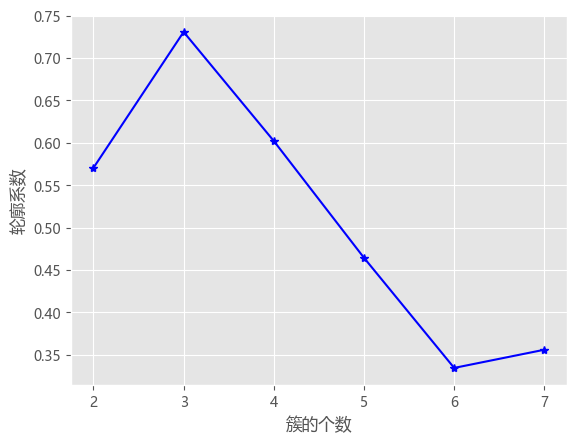

In [16]:
from sklearn import metrics
k_silhouette(X, 7)

In [17]:
Iris=pd.read_csv('iris.csv')

In [18]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
Iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X=Iris.drop(['Species'],axis=1)

In [21]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


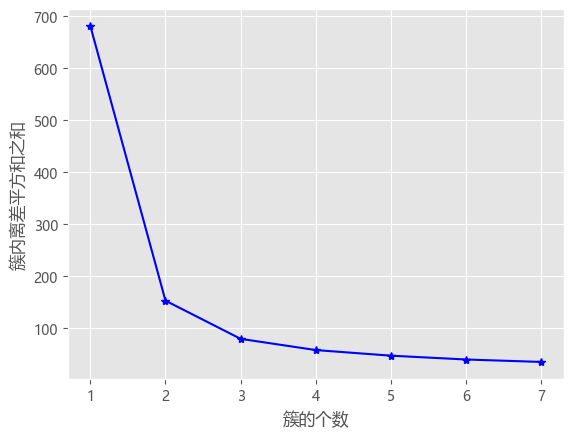

In [22]:
k_SSE(X, 7)

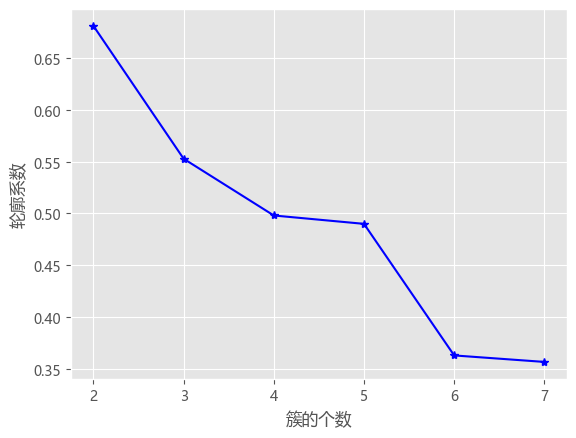

In [23]:
k_silhouette(X, 7)

In [24]:
set(Iris['Species'])

{'setosa', 'versicolor', 'virginica'}

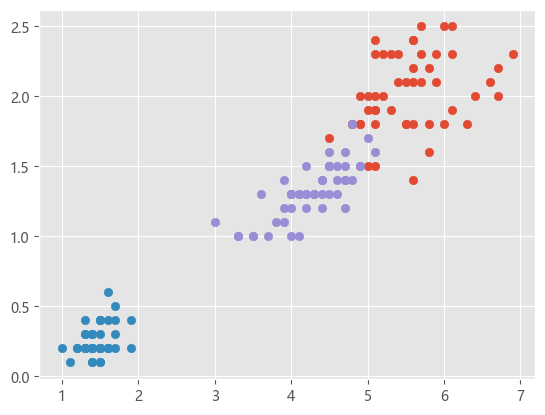

In [25]:
for value in set(Iris['Species']):
    plt.scatter(X[Iris['Species']==value]['Petal_Length'],X[Iris['Species']==value]['Petal_Width'])

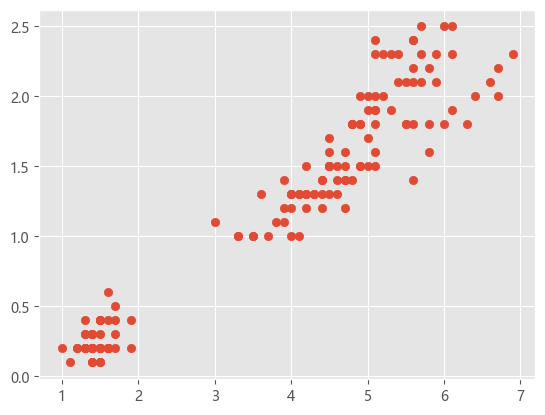

In [26]:
plt.scatter(X['Petal_Length'],X['Petal_Width'])

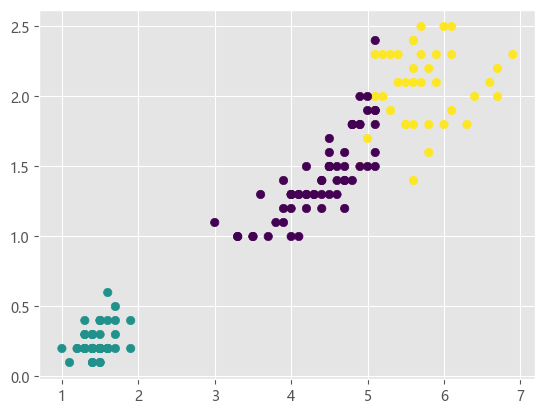

In [27]:
KM=KMeans(n_clusters=3)
KM.fit(X)
plt.scatter(X['Petal_Length'],X['Petal_Width'],c=KM.labels_)

In [28]:
from sklearn.datasets import make_moons

In [29]:
X,y=make_moons(n_samples=100,noise=0.05)

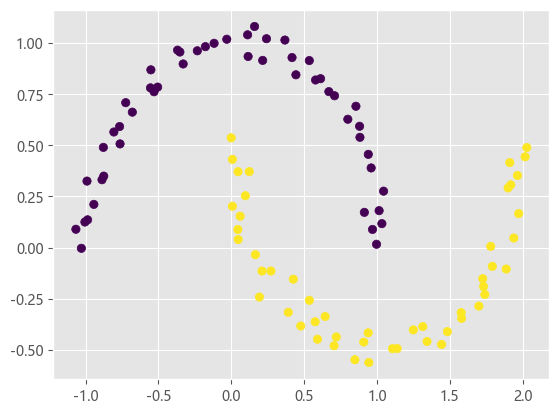

In [30]:
plt.scatter(X[:,0],X[:,1],c=y)

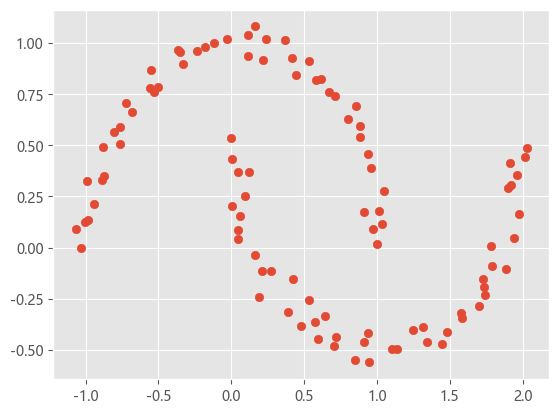

In [31]:
plt.scatter(X[:,0],X[:,1])

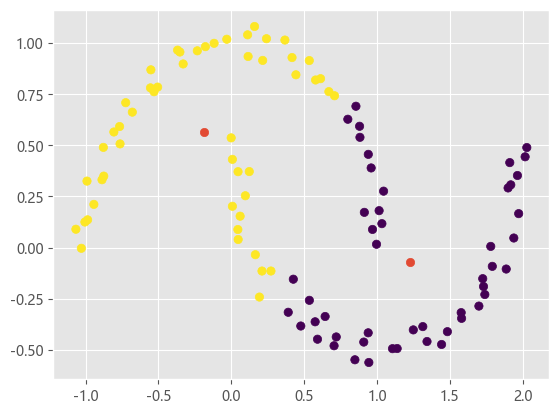

0.24235003122436236

In [32]:
KM=KMeans(n_clusters=2)
KM.fit(X)
center=KM.cluster_centers_
plt.scatter(X[:,0],X[:,1],c=KM.labels_)
plt.scatter(center[:,0],center[:,1])
plt.show()
metrics.adjusted_rand_score(y,KM.labels_)

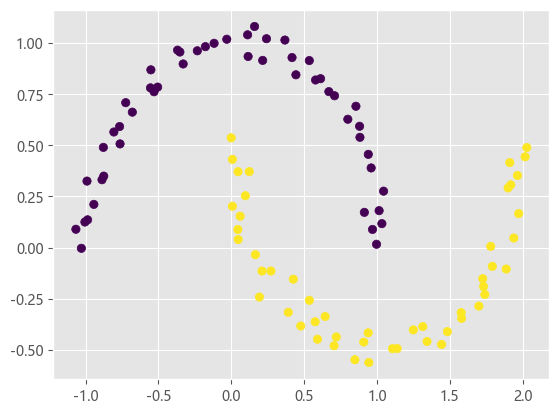

1.0

In [33]:
HC=cluster.AgglomerativeClustering(n_clusters=2,linkage='single')
#放数据到模型里
HC.fit(X)
plt.scatter(X[:,0],X[:,1],c=HC.labels_)
plt.show()
metrics.adjusted_rand_score(y,HC.labels_)

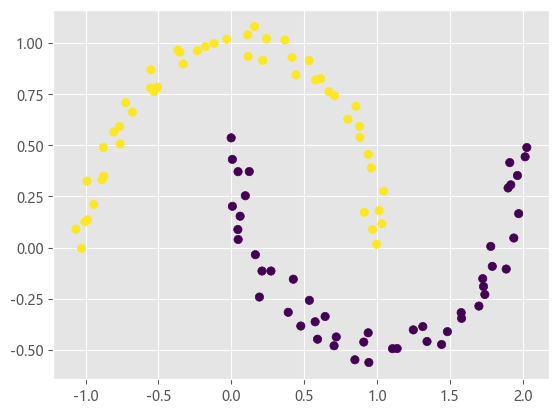

1.0

In [34]:
SC=cluster.SpectralClustering(n_clusters=2,gamma=100)
#放数据到模型里
SC.fit(X)
plt.scatter(X[:,0],X[:,1],c=SC.labels_)
plt.show()
metrics.adjusted_rand_score(y,SC.labels_)